## Data Preprocessing

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset

dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# dividing the data to X and y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [5]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
# spliting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

## Simple Linear Regression

In [8]:
# making a simple linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# predicting the value

y_pred = regressor.predict(X_test)

In [10]:
# checking the value

y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [11]:
# original value

y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

Text(0, 0.5, 'Exp')

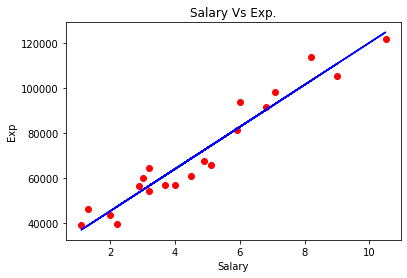

In [12]:
# plotting the data on training set

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary Vs Exp.')
plt.xlabel('Salary')
plt.ylabel('Exp')

Text(0, 0.5, 'Exp')

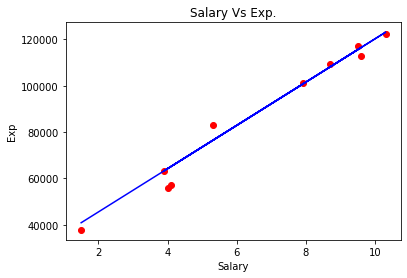

In [13]:
# plotting the data on test set

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary Vs Exp.')
plt.xlabel('Salary')
plt.ylabel('Exp')

In [14]:
# mean squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

21026037.329511296

## Multiple Linear Regression

In [15]:
# load dataset

dataset = pd.read_csv('50_Startups.csv')

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
# dividing the data to X and y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [18]:
# categorical variable

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Country column
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [19]:
# splitting in training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [20]:
# making a multiple linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# predicting the value

y_pred = regressor.predict(X_test)

In [22]:
# checking the value

y_pred

array([111616.64259451, 132709.39466316, 140155.11033793,  76099.20398184,
       186329.94240372, 112822.19807256,  63002.00394805,  99107.10428091,
       119287.75473384, 175522.83864739, 101000.69861501,  85772.99293235,
       117713.76481525,  90230.88085202, 133375.04389452, 167530.54765829,
       158013.54602063])

In [23]:
# original value

y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 , 155752.6 , 132602.65])

In [24]:
# mean squared error

mse = mean_squared_error(y_test, y_pred)
mse

118348525.66958116